# Toy generators

This notebooks contains a number of toy-classification generators

In [1]:
import logging

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [2]:
from ppu.viz import plot_dense_scatter, plot_ellipse_from_cov, plot_pdf_contours

## Config

In [3]:
colors = ppu.viz.set_plot_style(True)

In [4]:
def _get_32bit_seed(rng):
    return rng.integers(low=0, high=np.iinfo(np.uint32).max, size=1, dtype=np.uint32)[0]

In [5]:
rng = np.random.Generator(np.random.PCG64DXSM(42))

In [6]:
n_samples = 10_000

In [7]:
from ppu.generator import Circular

In [72]:
gen = Circular(rng=rng, class_sep=1.1, scale=(0.25, 0.35))

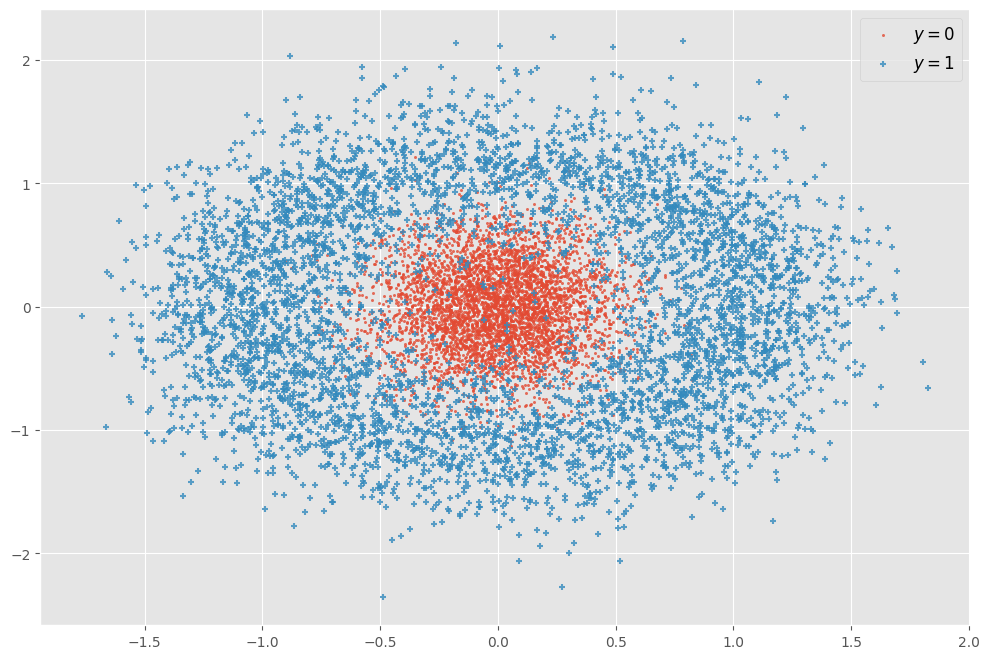

In [73]:
ax = gen.plot_rvs(n_samples)

In [74]:
X_train, y_train = gen.rvs(5000)

In [75]:
from xgboost import XGBClassifier

In [76]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
X_test, y_test = gen.rvs(5000)

In [78]:
pred = model.predict(X_test)

<Axes: >

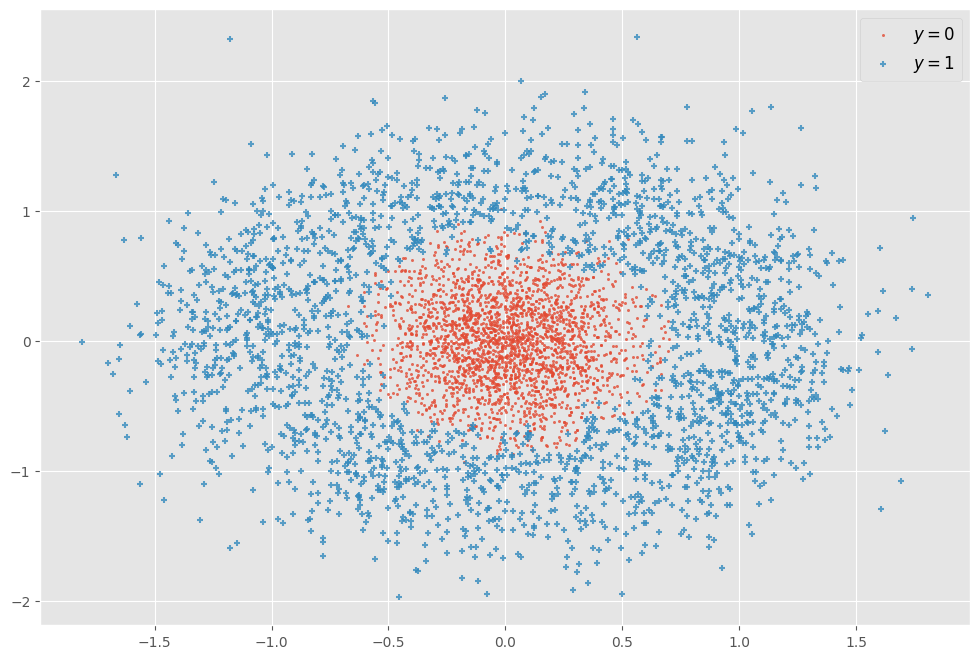

In [79]:
gen.plot_rvs(X=X_test, y=pred)

In [80]:
import mmu

In [81]:
from mmu import PRU, PRCU

In [82]:
curve_error = PRCU.from_classifier(model, X_test, y_test, n_sigmas=10)

(-0.005, 1.005)

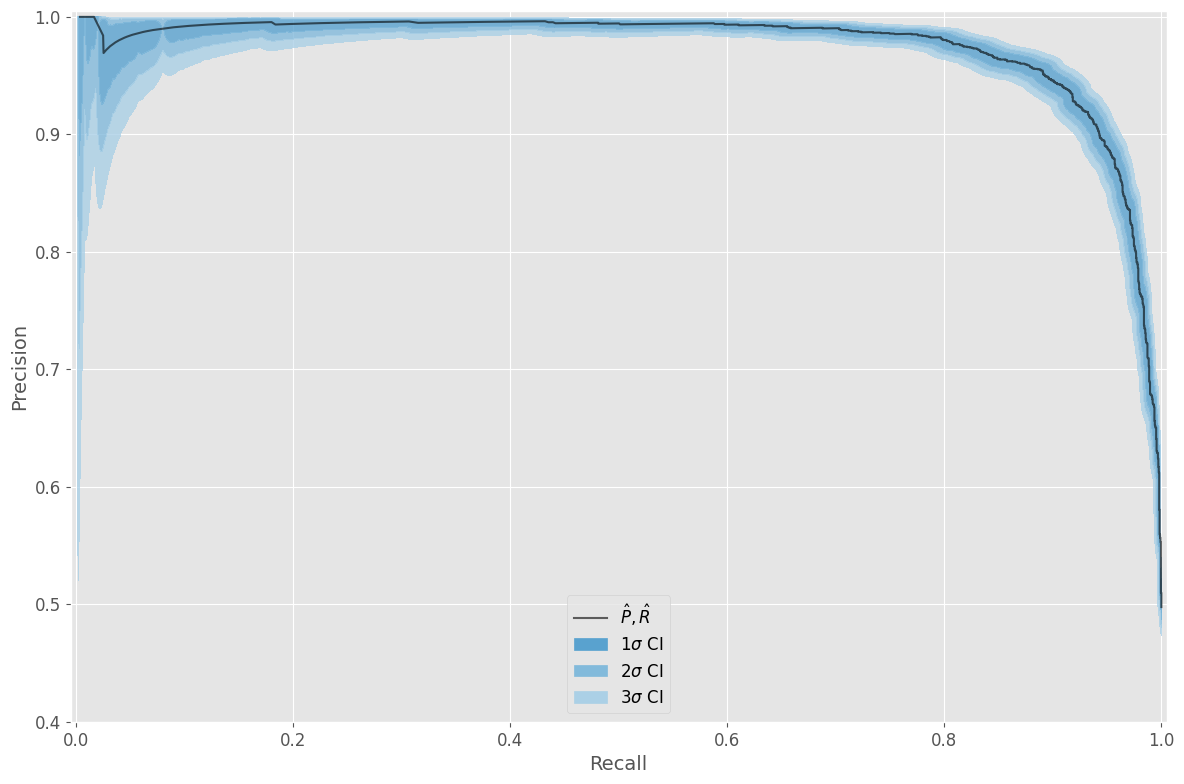

In [83]:
ax = curve_error.plot(limit_axis=False, equal_aspect=False)
ax.set_ylim(0.4, 1.005)
ax.set_xlim(-0.005, 1.005)

In [87]:
point_error = PRU.from_classifier(model, X_test, y_test)

In [90]:
mmu.conf_mat_to_df(point_error.conf_mat)

estimated         
                   negative positive
observed negative      2358      154
         positive       209     2279

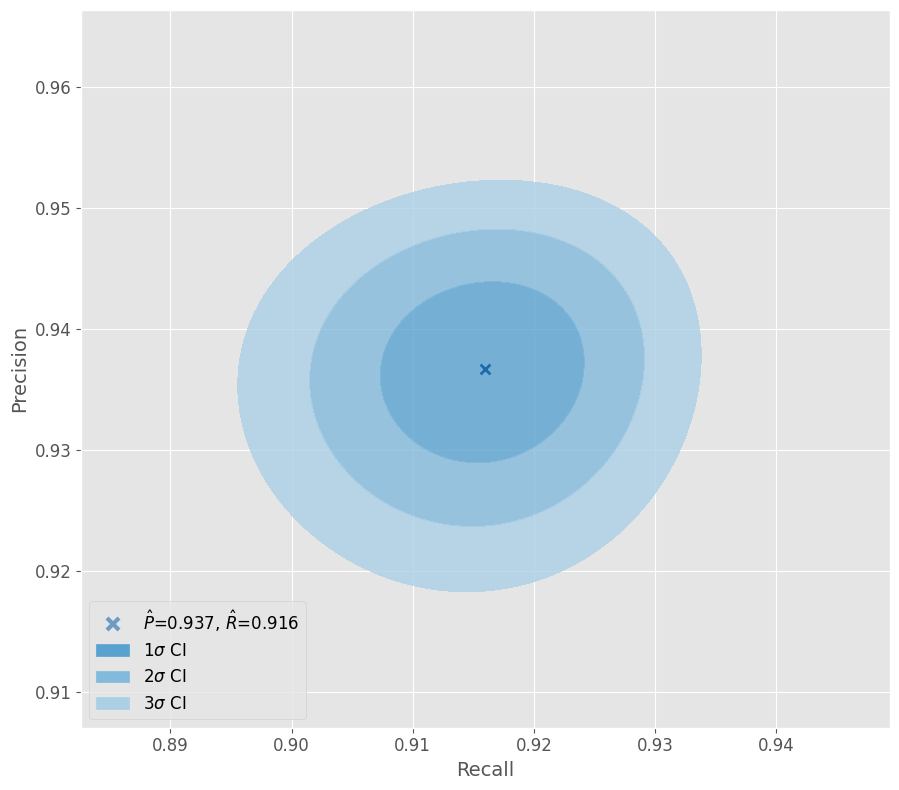

In [92]:
_ = point_error.plot()

## Binned statistic

In [93]:
from scipy.stats import binned_statistic_2d

In [95]:
binned_statistic_2d(X_test[:, 0], X_test[:, 1], y_test) 

BinnedStatistic2dResult(statistic=array([[       nan, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ,        nan,        nan],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 0.95      , 0.97142857,
        0.97530864, 1.        , 1.        ,        nan,        nan],
       [1.        , 1.        , 0.95348837, 0.5375    , 0.16190476,
        0.46391753, 0.91549296, 0.98148148, 1.        ,        nan],
       [1.        , 1.        , 0.6375    , 0.05327869, 0.002079  ,
        0.05755396, 0.54368932, 0.96363636, 1.        ,        nan],
       [1.        , 0.97619048, 0.68686869, 0.0781893 , 0.0020202 ,
        0.05517241, 0.59756098, 0.95744681, 1.        , 1.        ],
       [1.        , 1.        , 0.92857143, 0.4893617 , 0.2293578 ,
        0.38888889, 0.8902439 , 1.        , 1.        , 1.        ],
       